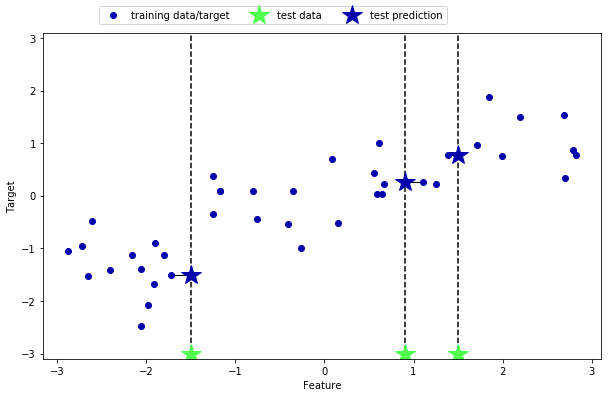

In [2]:
# To Analyze KNN Regression
# The 1st sample is a single neighbor and using the wave dataset.
import mglearn
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [3]:
# Here, we see three grenn starts at the bottom of x-axis.  They are test data points.
# The x-axis is the feature of training and test data points.
# The y-axis is the  target of  training and test data points.
# Drop a vertical line for each green start, we want to find the nearest traing data point, blue point, of the green start.
# Then, calculating the distance, of difference, between the blue point and the vertical line of green start,
# we can predict the value of the green start.

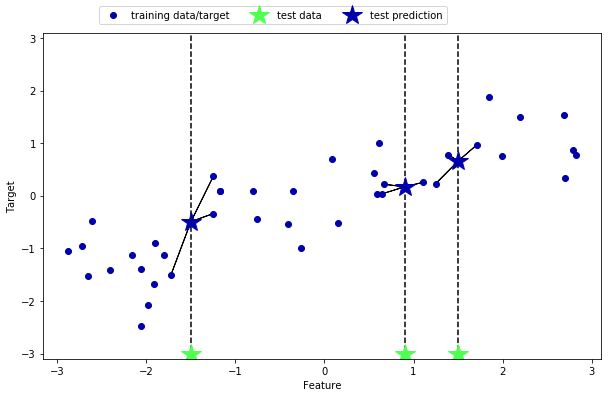

In [4]:
# Now try the multiple neighbors.  Set neighbors to 3.
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [5]:
# We calculate the average of distances between each vertical line and 3 nearest blue points.
# However, this time , each distance has the vector.

In [6]:
# The KNN for regression is implemented in KNeighborsRegressor class in scikit-learn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#  Steps of repdicting regression problem
# 1. Get the data and target of Wave from mglearn
# 2. Split the data and target into two groups, training and test
# 3. Create the KNeighborsRegressor object and set the # of neighbors
# 4. Traing the KNeighborsRegressor by fit method
# 5. Make the prediction by predict method
# 6. Scored the prediction by score method

# Step 1. Get the Data(X) and target(y) data of Wave from mglearn
X, y = mglearn.datasets.make_wave(n_samples=40)

# Step 2. Split the data into traing and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Step 3. Create the KNeighborsRegressor object and initiate the number of neighbor to 3 
reg = KNeighborsRegressor(n_neighbors = 3)

# Step 4. Training the model by the fit method
reg.fit(X_train, y_train)

# Step 5. Do the prediction of test data
print('Predict result: {}'.format(reg.predict(X_test)))

# Step 6. Evaluate the prediction by score method
print('Evaluate the prediction: {}'.format(reg.score(X_test, y_test)))


Predict result: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Evaluate the prediction: 0.8344172446249604


In [7]:
# For Regression, the score method return the R^2 score.
# R^2,  also know as the coefficient of determination, is a measure of goodness of a prediction of the regression model.
# Its value is between 0 and 1.

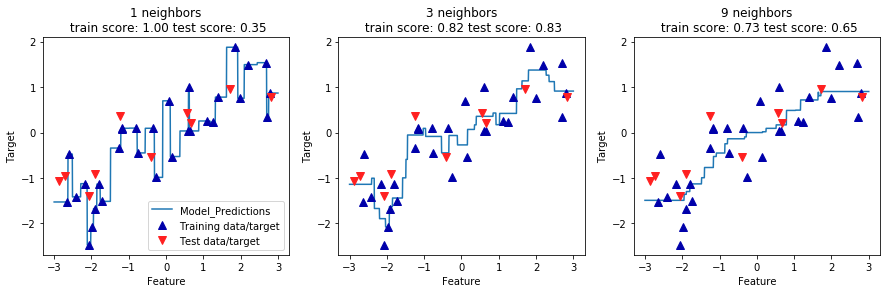

In [8]:
# To show prediction result of the one-dimension dataset
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 points, evenly spaced between 3 and -3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # Make prediction using 1, 3, 9 neighbors.
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title('{} neighbors\n train score: {:.2f} test score: {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model_Predictions', 'Training data/target', 'Test data/target'], loc='best')